# Задача 5. Обучение без учителя

* **Дедлайн**: 14.03.2025, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [ ] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [ ] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [ ] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [ ] При обучении использовать **подбор гиперпараметров**.
- [ ] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [ ] * (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [ ] * (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

# Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.

Dataset: The Human Activity Recognition database(https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones)

In [110]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [111]:
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")
df_train = pd.read_csv(path + "/train.csv")
df_test = pd.read_csv(path + "/test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

In [112]:
df.shape

(10299, 563)

Содержит 563 признака

# Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.

In [113]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Общая информация

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [115]:
df.isnull().sum().sum()

np.int64(0)

0 пропущенных значений.

In [116]:
df.duplicated().sum()

np.int64(0)

0 дубликтов.

In [117]:
const_cols = df.columns[df.nunique(dropna=False) <= 1].tolist()
print("constant cols:", const_cols)

constant cols: []


0 константных столбцов

Посмотрим на количество данных по целевым признакам "Activity" и "subject". "Activity" - активность, которую делал человек во время сбора данных и "subject" - номер человека, который делал активность.

In [118]:
df['subject'].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
24    381
27    376
23    372
17    368
16    366
18    364
19    360
20    354
1     347
29    344
3     341
15    328
13    327
6     325
14    323
22    321
12    320
4     317
11    316
7     308
5     302
2     302
10    294
9     288
8     281
Name: count, dtype: int64

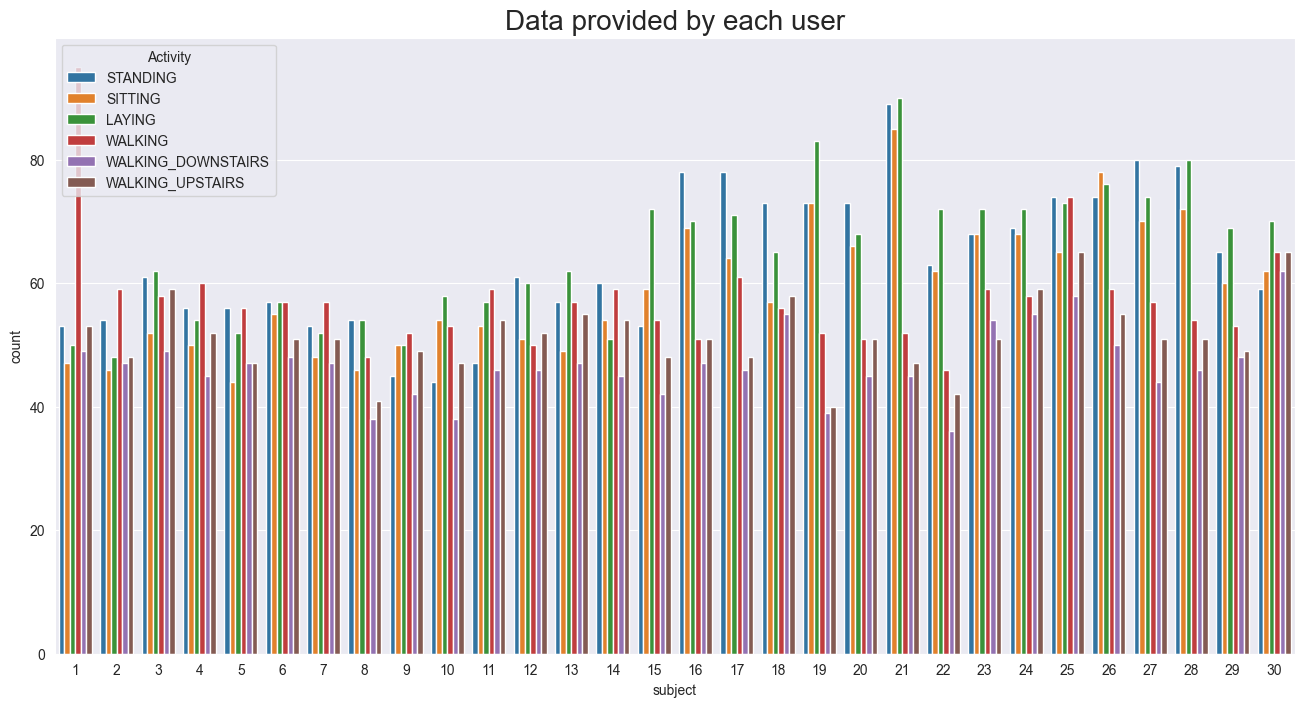

In [119]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

У каждого участника было взято примерно равное количество данных.

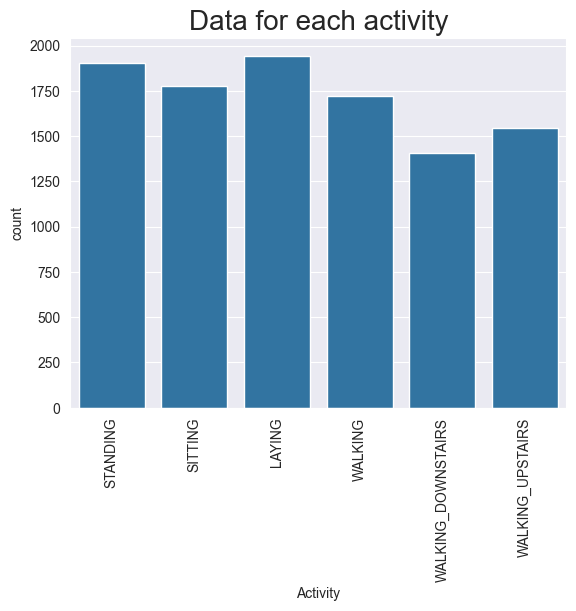

In [120]:
plt.title('Data for each activity', fontsize=20)
sns.countplot(x='Activity', data = df)
plt.xticks(rotation=90)
plt.show()

Для каждой активности было взято примерно равное количество данных.

Удалим из данных столбец показывающий номер человека, которому принадлежат данные. Эта информация не информативна в рамках задачи

In [121]:
df1 = df.drop(columns=["subject"])
df1 # убрали subject

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


Изменим названия колонок, убрав лишние символы '(', ')', '-', ','

In [122]:
df1.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [123]:
columns = df1.columns

columns = columns.str.replace(r'[()\-,]', '', regex=True)

df1.columns = columns

df1.columns


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagskewness', 'fBodyBodyGyroJerkMagkurtosis',
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'Activity'],
      dtype='object', length=562)

Переделаем строковые значения в "Activity" в числовые от 0 до 5

In [124]:
df1['Activity_num'] = 0
df1.loc[df1['Activity'] == "WALKING_UPSTAIRS", 'Activity_num'] = 1
df1.loc[df1['Activity'] == "WALKING_DOWNSTAIRS", 'Activity_num'] = 2
df1.loc[df1['Activity'] == "SITTING", 'Activity_num'] = 3
df1.loc[df1['Activity'] == "STANDING", 'Activity_num'] = 4
df1.loc[df1['Activity'] == "LAYING", 'Activity_num'] = 5
print(df1["Activity_num"].dtype)
df2 = df1.drop(columns=["Activity"])  # убрали subject и Activity
df2

int64


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Activity_num
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,4
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,4
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,4
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,4
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,1
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,1
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,1
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,1


# Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.

In [125]:
Y = df2["Activity_num"]
X = df2.drop(["Activity_num"], axis=1)

Методом локтя узнаем оптимальное кол-во кластеров

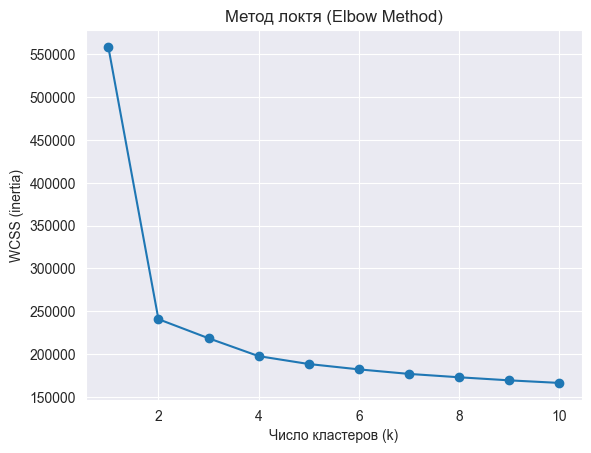

In [126]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('WCSS (inertia)')
plt.title('Метод локтя (Elbow Method)')
plt.show()

Из графика видно что, согласно данной эвристике, оптимальным числом кластеров может быть 2

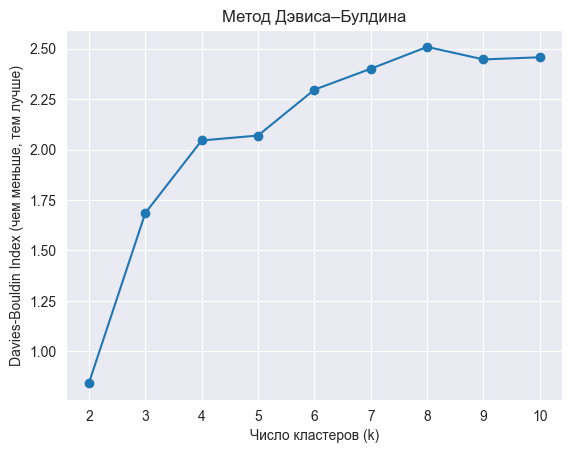

In [127]:
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    score = davies_bouldin_score(X, kmeans.labels_)
    scores.append(score)

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Davies-Bouldin Index (чем меньше, тем лучше)')
plt.title('Метод Дэвиса–Булдина')
plt.show()

Из графика видно что, согласно данной эвристике, оптимальным числом кластеров может быть 2

In [128]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_random_state
from sklearn.utils.validation import check_is_fitted
import numpy as np

class MyCustomKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=2, tol=1e-4, random_state=42, max_iter=500, eps=0.01):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state
        self.max_iter = max_iter
        self.eps = eps

    def fit(self, X, y=None):
        X = check_array(X)
        rng = check_random_state(self.random_state)
        n_samples, n_features = X.shape

        init_idx = rng.choice(n_samples, self.n_clusters, replace=False)
        self.cluster_centers_ = X[init_idx].copy()

        for _ in range(self.max_iter):
            dists = np.linalg.norm(X[:, None, :] - self.cluster_centers_[None, :, :], axis=2)
            labels = np.argmin(dists, axis=1)

            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.allclose(self.cluster_centers_, new_centers):
                break
            self.cluster_centers_ = new_centers
        return self


    def predict(self, X):
        check_is_fitted(self, 'cluster_centers_')
        X = check_array(X)
        dists = np.linalg.norm(X[:, None, :] - self.cluster_centers_[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)
        return labels

### Визуализация данных со снижением размерности
### Использование PCA

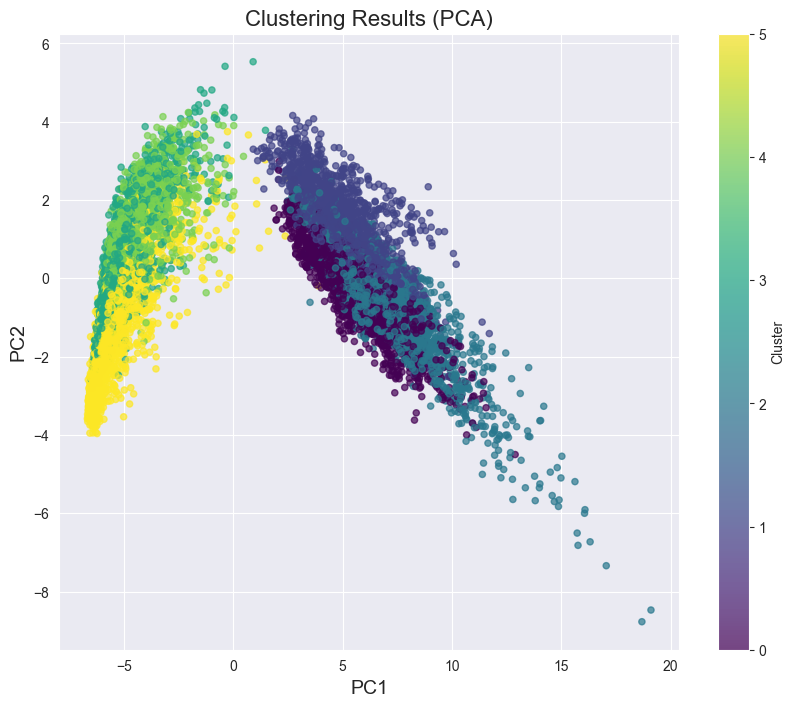

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', alpha=0.7, s=20)
plt.title("Clustering Results (PCA)", fontsize=16)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.colorbar(label='Cluster')
plt.show()

### Использование TSNE

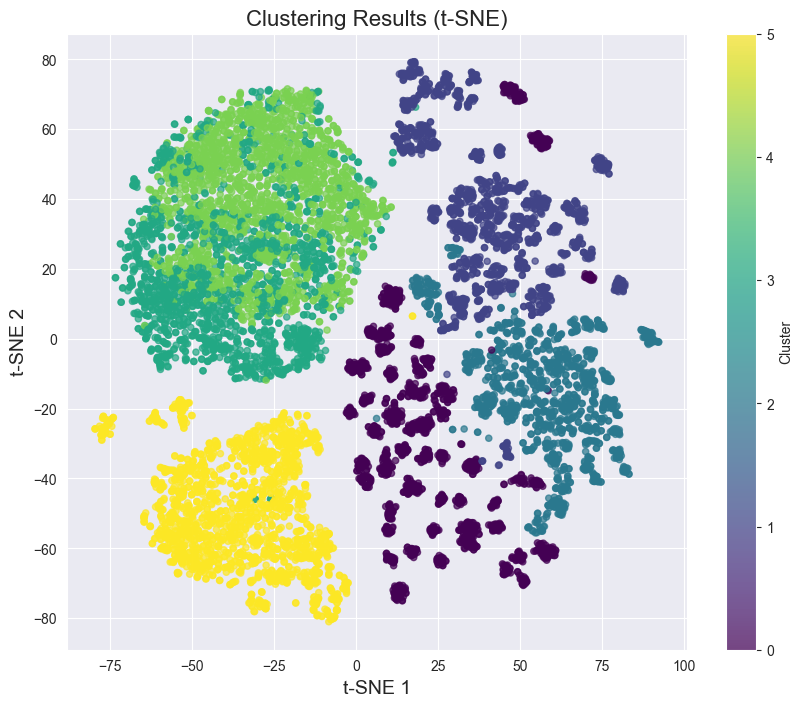

In [130]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X, Y)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', alpha=0.7, s=20)
plt.title("Clustering Results (t-SNE)", fontsize=16)
plt.xlabel("t-SNE 1", fontsize=14)
plt.ylabel("t-SNE 2", fontsize=14)
plt.colorbar(label='Cluster')
plt.show()

### Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд)

In [131]:
from sklearn.metrics import silhouette_score
import time
from sklearn.cluster import DBSCAN

models = [
        (MyCustomKMeans(), 'KMeans (custom)'),
        (KMeans(n_clusters=3, n_init=10, random_state=42), 'KMeans (sklearn)'),
        (DBSCAN(), 'DBSCAN (sklearn)'),
    ]

stats = []
for model, title in models:
    start = time.time()
    model.fit(X)
    elapsed = time.time() - start

    sil = silhouette_score(X, Y)
    db = davies_bouldin_score(X, Y)
    stats.append([title, "no_pca", elapsed, sil, db])


In [132]:
df = pd.DataFrame(stats, columns=['algorithm', 'pca_flag', 'time', 'silhouette', 'davies_bouldin'])
print(df)

          algorithm pca_flag      time  silhouette  davies_bouldin
0   KMeans (custom)   no_pca  0.877992    0.061707        3.560995
1  KMeans (sklearn)   no_pca  1.230557    0.061707        3.560995
2  DBSCAN (sklearn)   no_pca  1.654323    0.061707        3.560995


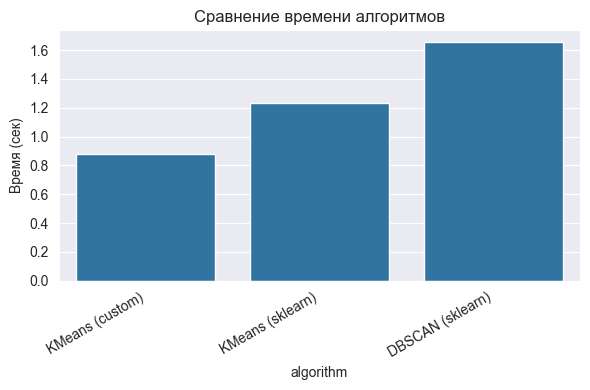

In [133]:
plt.figure(figsize=(6,4))
sns.barplot(x='algorithm', y='time', data=df)
plt.xticks(rotation=30, ha='right')
plt.ylabel("Время (сек)")
plt.title("Сравнение времени алгоритмов")
plt.tight_layout()
plt.show()

По времени кастомная версия сработала чуть быстрее

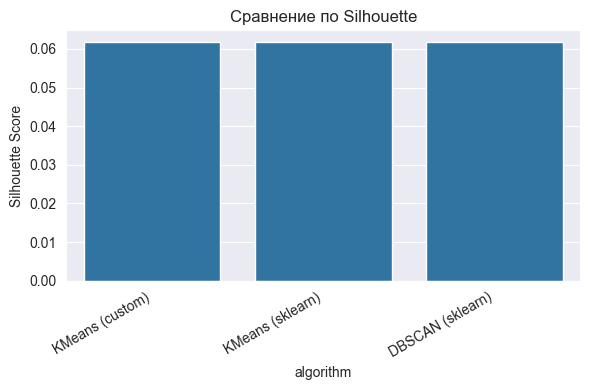

In [134]:
plt.figure(figsize=(6,4))
sns.barplot(x='algorithm', y='silhouette', data=df)
plt.xticks(rotation=30, ha='right')
plt.ylabel("Silhouette Score")
plt.title("Сравнение по Silhouette")
plt.tight_layout()
plt.show()

По критерию Silhouette все версии равны

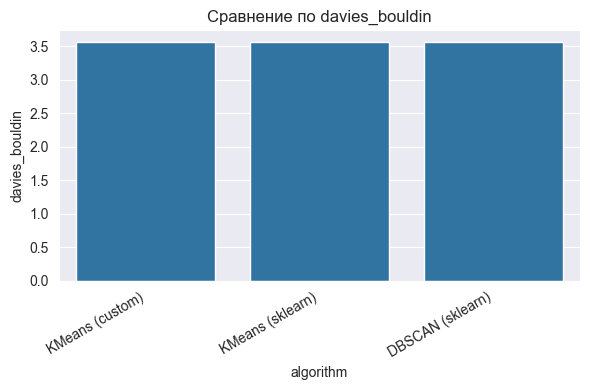

In [135]:
plt.figure(figsize=(6,4))
sns.barplot(x='algorithm', y='davies_bouldin', data=df)
plt.xticks(rotation=30, ha='right')
plt.ylabel("davies_bouldin")
plt.title("Сравнение по davies_bouldin")
plt.tight_layout()
plt.show()

По критерию davies_bouldin все версии равны

### Тренировка на данных с **PCA** и сравнение

In [136]:
for model, title in models:
    start = time.time()
    model.fit(X_pca)
    elapsed = time.time() - start

    sil = silhouette_score(X_pca, Y)
    db = davies_bouldin_score(X_pca, Y)
    stats.append([title, "pca", elapsed, sil, db])

In [137]:
df = pd.DataFrame(stats, columns=['algorithm', 'pca_flag', 'time', 'silhouette', 'davies_bouldin'])
print(df)

          algorithm pca_flag      time  silhouette  davies_bouldin
0   KMeans (custom)   no_pca  0.877992    0.061707        3.560995
1  KMeans (sklearn)   no_pca  1.230557    0.061707        3.560995
2  DBSCAN (sklearn)   no_pca  1.654323    0.061707        3.560995
3   KMeans (custom)      pca  0.004540    0.036872        2.819471
4  KMeans (sklearn)      pca  0.034874    0.036872        2.819471
5  DBSCAN (sklearn)      pca  0.264602    0.036872        2.819471


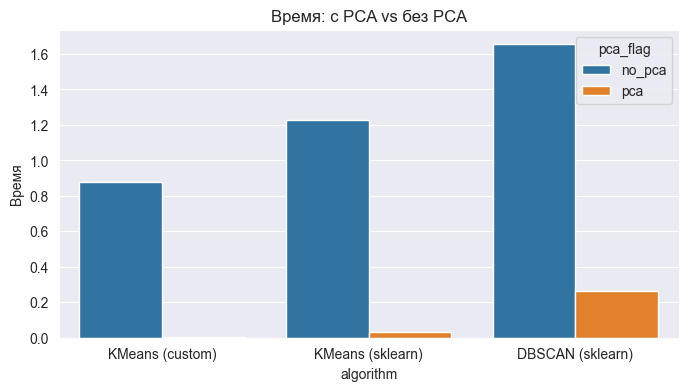

In [138]:
plt.figure(figsize=(8,4))
sns.barplot(x='algorithm', y='time', hue='pca_flag', data=df)
plt.title(f"Время: с PCA vs без PCA")
plt.ylabel("Время")
plt.show()

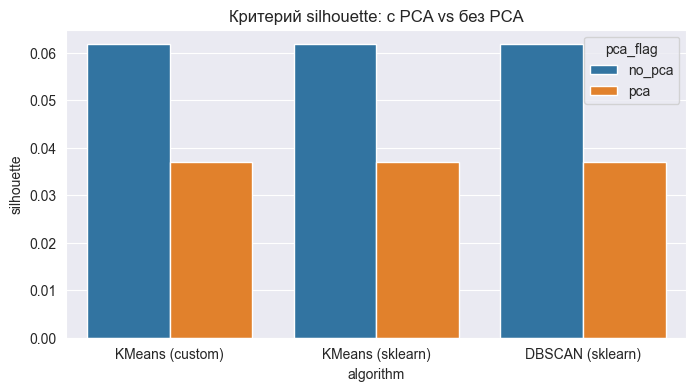

In [139]:
plt.figure(figsize=(8,4))
sns.barplot(x='algorithm', y='silhouette', hue='pca_flag', data=df)
plt.title(f"Критерий silhouette: с PCA vs без PCA")
plt.ylabel("silhouette")
plt.show()

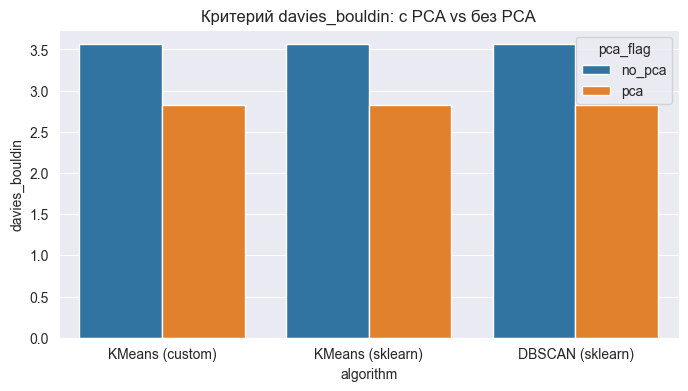

In [140]:
plt.figure(figsize=(8,4))
sns.barplot(x='algorithm', y='davies_bouldin', hue='pca_flag', data=df)
plt.title(f"Критерий davies_bouldin: с PCA vs без PCA")
plt.ylabel("davies_bouldin")
plt.show()

### Итог
Лучше всего справился кастомный алгоритм KMeans с использованием PCA